In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import graph as gr
import seaborn as sns

In [2]:
sys.setrecursionlimit(10000)

# demand 3

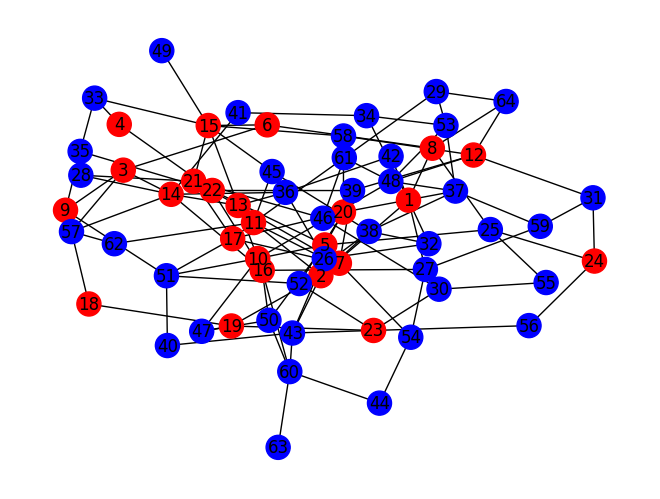

In [3]:
p = 0.5
n = 64
d1 = 10
d2 = 6

for i in range (100): 
    rsrg_graph, color_map = gr.RSRG(p, n, d1, d2)    

nx.draw(rsrg_graph, node_color=color_map, with_labels=True)
plt.show()

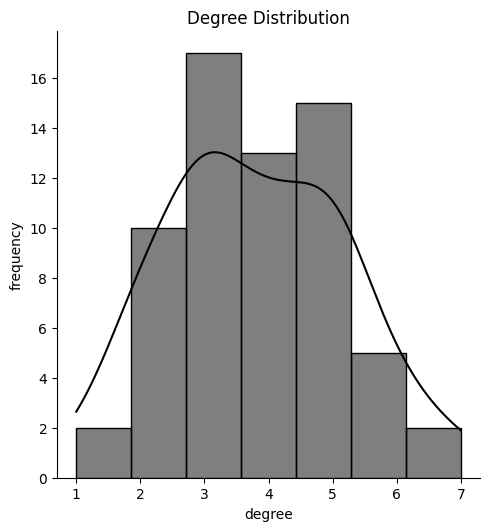

In [4]:
gr.draw_degree_distribution(rsrg_graph)

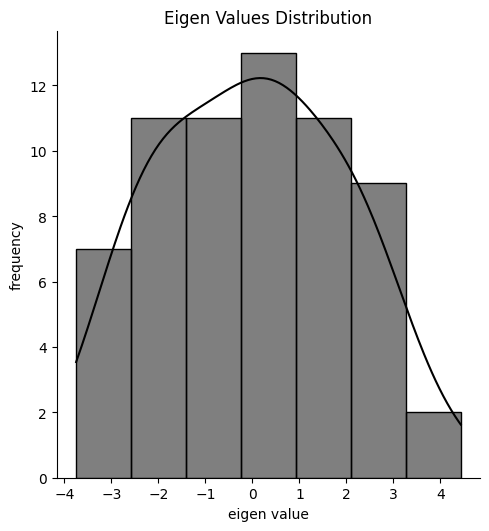

In [5]:
gr.draw_eigen_values_distribution(rsrg_graph)

In [6]:
# create a dataset of RSRG graphs
number_of_simulation = 100
p = 0.9
n = 100
d1 = 10
d2 = 15

spectral_gap = []
algebratic_connectivity = []
energy = []
laplacian_energy = []
symmetry_ratio = []

for i in range(number_of_simulation):
    rsrg_graph, color_map = gr.RSRG(p, n, d1, d2) 
    
    spectral_gap.append(gr.spectral_gap(rsrg_graph))
    algebratic_connectivity.append(gr.algebraic_connectivity(rsrg_graph))
    energy.append(gr.energy(rsrg_graph))
    laplacian_energy.append(gr.laplacian_energy(rsrg_graph))
    symmetry_ratio.append(gr.symmetry_ratio(rsrg_graph))


# Spectral Gap

mean is 5.555391072416001
standard deviation is 0.23015351137631074
CI is (5.510280984186244, 5.600501160645758)


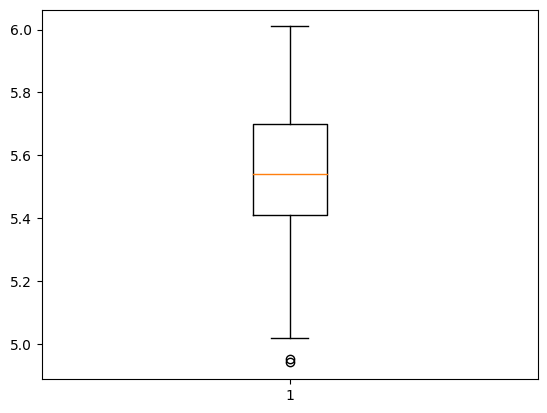

In [7]:
gr.calculate_statistics_parameters(spectral_gap)   

# Algebratic Connectivity

mean is 4.379489617261999
standard deviation is 0.2556176875717196
CI is (4.329388550497942, 4.429590684026056)


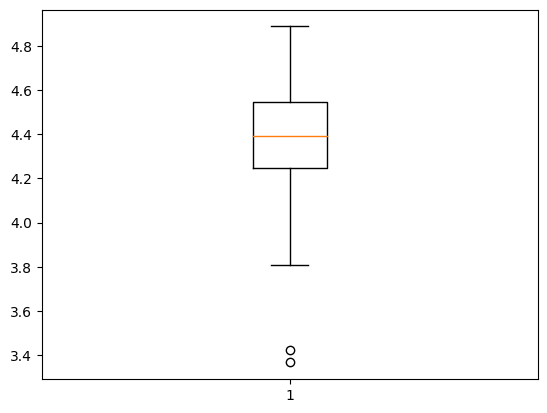

In [8]:
gr.calculate_statistics_parameters(algebratic_connectivity)

# Energy

mean is 271.86731130224297
standard deviation is 2.159688089026205
CI is (271.44401243679386, 272.2906101676921)


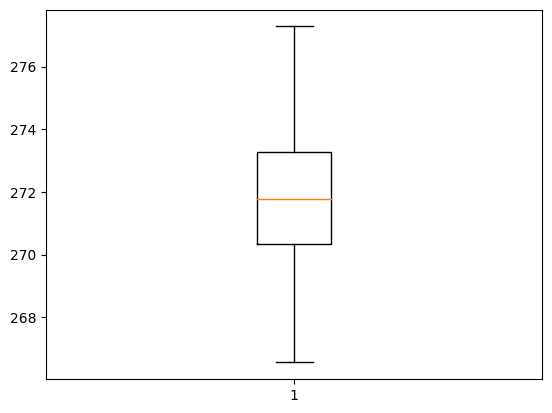

In [9]:
gr.calculate_statistics_parameters(energy)

# Laplacian Energy

mean is 344.041859302498
standard deviation is 5.784131382371592
CI is (342.90816955155316, 345.1755490534428)


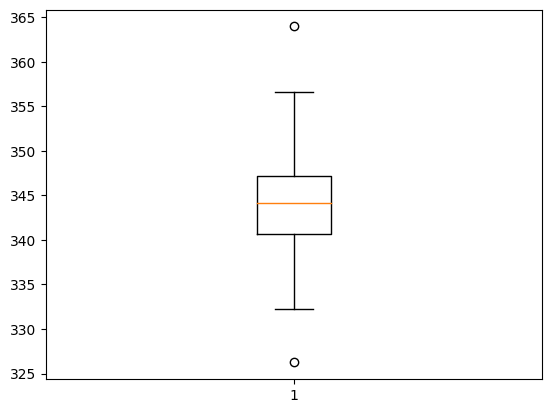

In [10]:
gr.calculate_statistics_parameters(laplacian_energy)

# Symmetry Ratio

mean is 23.95
standard deviation is 2.03654118544163
CI is (23.55083792765344, 24.34916207234656)


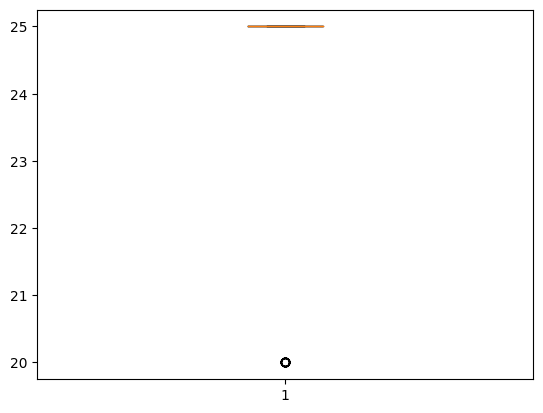

In [11]:
gr.calculate_statistics_parameters(symmetry_ratio)

# Compare RSRG, RSRBG, ER
we consider graphs with same n, p, d

In [12]:
number_of_simulation = 100
n = 120
p = 0.5
d1 = 15
d2 = 25

er_graphs = [] # ER graph dataset
rsrg_graphs = [] # RSRG graph dataset
rsrbg_graphs = [] # RSRBG graph

for i in range(number_of_simulation):
    er_graphs.append(nx.gnp_random_graph(n, p))
    rsrg_graphs.append(gr.RSRG(p, n, d1, d2))
    rsrbg_graphs.append(gr.RSRBG(n, d1, d2))

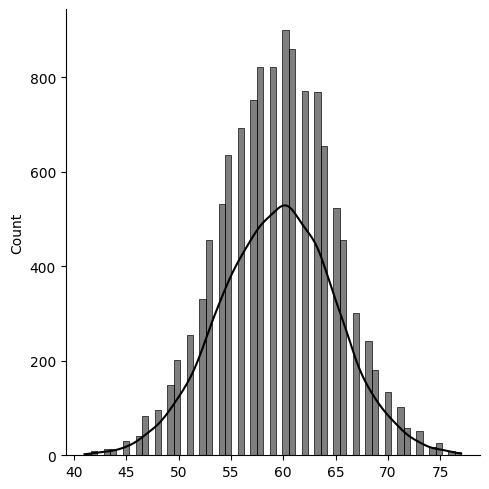

In [13]:
er_degrees = []
for er in er_graphs:
    degrees = [d for n, d in er.degree()]
    er_degrees += degrees
    
sns.displot(er_degrees, kde=True, color="black")

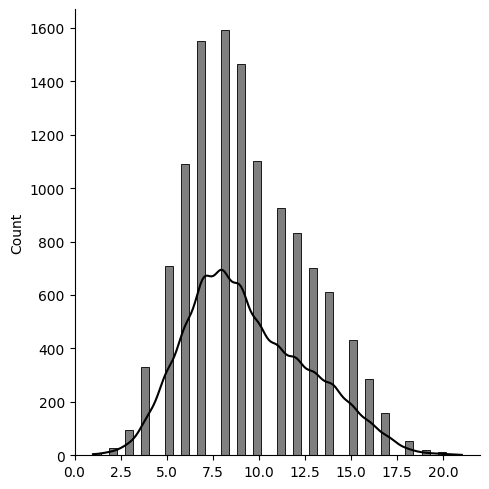

In [14]:
# sample for 100 rsrg graph
rsrg_degrees = []
for rsrg in rsrg_graphs:
    degrees = [d for n, d in rsrg[0].degree()]
    rsrg_degrees += degrees

sns.displot(rsrg_degrees, kde=True, color="black")    

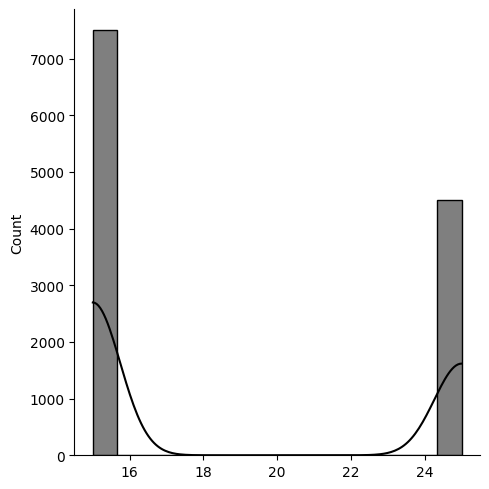

In [15]:
# rsrbg degree
rsrbg_degrees = []
for rsrbg in rsrbg_graphs:
    degrees = [d for n, d in rsrbg[0].degree()]
    rsrbg_degrees += degrees

sns.displot(rsrbg_degrees, kde=True, color="black")  

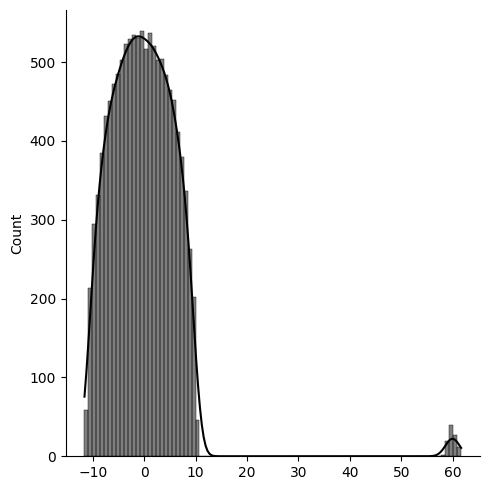

In [16]:
er_eigen_vals = []
for er in er_graphs:
    er_eigen_vals += list(gr.adjacency_eigen_values(er))
    
sns.displot(er_eigen_vals, kde=True, color="black")

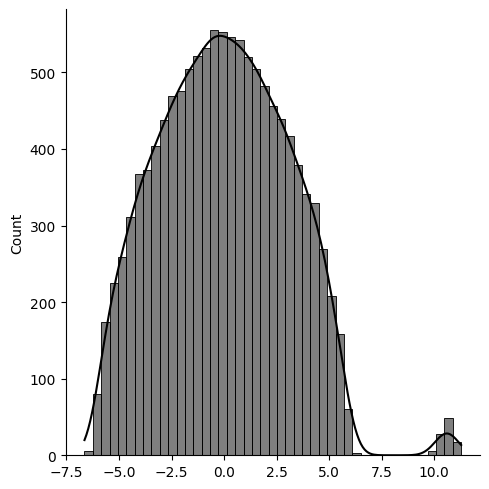

In [19]:
rsrg_eigen_vals = []

for rsrg in rsrg_graphs:
    rsrg_eigen_vals += list(gr.complex_abs(gr.adjacency_eigen_values(rsrg[0])))
    
sns.displot(rsrg_eigen_vals, kde=True, color="black")

# rsrbg eigen values

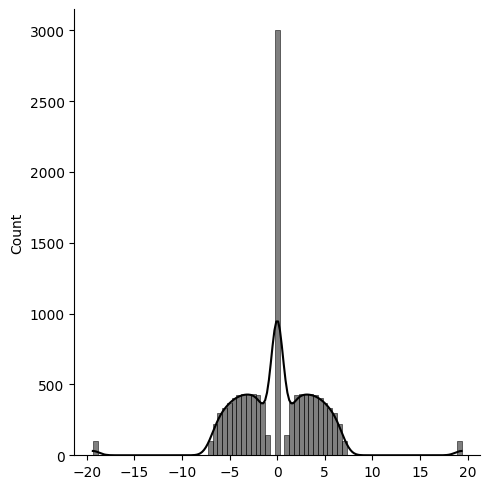

In [20]:
rsrbg_eigen_vals = []

for rsrbg in rsrbg_graphs:
    rsrbg_eigen_vals += list(gr.complex_abs(gr.adjacency_eigen_values(rsrbg[0])))
    
sns.displot(rsrbg_eigen_vals, kde=True, color="black")

# Algebratic Connectivity

In [21]:
number_of_simulation = 100

n = 100
p = 0.5
d1 = 50
d2 = 50

rsrg_graphs = []
for _ in range(number_of_simulation):
    rsrg_graphs.append(gr.RSRG(p, n, d1, d2))    

mean is 4.379489617261999
standard deviation is 0.2556176875717196
CI is (4.329388550497942, 4.429590684026056)


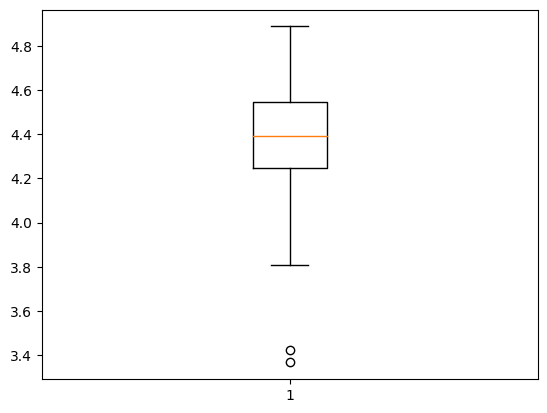

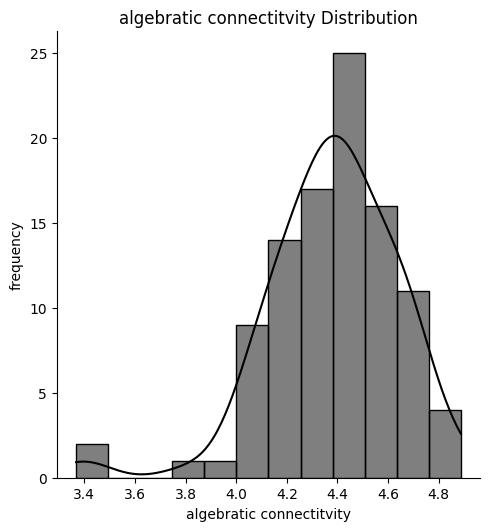

In [22]:
algebtatic_connectivity = []
for rsrg in rsrg_graphs:
    algebtatic_connectivity.append(gr.algebraic_connectivity(rsrg[0]))

gr.calculate_statistics_parameters(algebratic_connectivity)
gr.draw_distribution(algebratic_connectivity, "algebratic connectitvity")